[View in Colaboratory](https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/10minutes_to_pandas.ipynb)

# 10 minutes to pandas

원문링크: http://pandas.pydata.org/pandas-docs/stable/10min.html

# Object Creation

In [0]:
# 기본 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt

In [2]:
# pd.Series 를 생성해보자. 하나의 열로 되어있는 리스트라고 하면 될까? 
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# 이번엔 pd.DataFrame 을 만들어보자. 관계형 데이터베이스의 테이블이라고 생각하자
# Series 들이 모이면 DataFrame 이 된다. 
dates = pd.date_range('20180523', periods=6)
dates

DatetimeIndex(['2018-05-23', '2018-05-24', '2018-05-25', '2018-05-26',
               '2018-05-27', '2018-05-28'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# 표준정규분포 (standard normal distribution)에 따르는 랜덤값으로 6x4 만큼에 데이터를 만들어낸다
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2018-05-23,-0.638557,-0.613279,0.021428,-0.996500
2018-05-24,-1.197896,-1.497643,0.024177,1.265205
2018-05-25,0.079556,-0.716654,0.425823,0.003608
2018-05-26,0.153308,0.231155,1.861366,-1.669781
2018-05-27,0.057988,0.820522,0.480691,-0.001284
2018-05-28,0.503431,0.333456,-0.100551,-0.119406


In [9]:
# 이번에는 각 column 을 다양한 방법으로 전달해서 DataFrame 을 만들어보자
# 하나의 column 은 딕셔너리의 key:value 쌍처럼 생각하면 되겠다.
df2 = pd.DataFrame({ 'A' : 1., 
                   'B' : pd.Timestamp('20180523'), 
                   'C' : pd.Series(1, index=list(range(4)), dtype='float32'),
                   'D' : np.array([3] * 4, dtype='int32'),
                   'E' : pd.Categorical(["test", "train", "test", "train"]),
                   'F' : 'foo'
                   })
df2

,A,B,C,D,E,F
0,1.0,2018-05-23,1.0,3,test,foo
1,1.0,2018-05-23,1.0,3,train,foo
2,1.0,2018-05-23,1.0,3,test,foo
3,1.0,2018-05-23,1.0,3,train,foo


In [11]:
# 각 column 의 data type 을 보자
print (df.dtypes)
print (df2.dtypes)

A    float64
B    float64
C    float64
D    float64
dtype: object
A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object


In [12]:
# DataFrame 이름에 TAB 만 쳐도 자동완성이 된다.해보시라
df2.

SyntaxError: ignored

# Viewing Data

In [13]:
# frame 의 맨 위와 아래를 보기
print (df.head(3))
print (df.tail(3))

                   A         B         C         D
2018-05-23 -0.638557 -0.613279  0.021428 -0.996500
2018-05-24 -1.197896 -1.497643  0.024177  1.265205
2018-05-25  0.079556 -0.716654  0.425823  0.003608
                   A         B         C         D
2018-05-26  0.153308  0.231155  1.861366 -1.669781
2018-05-27  0.057988  0.820522  0.480691 -0.001284
2018-05-28  0.503431  0.333456 -0.100551 -0.119406


In [15]:
# frame 의 세 요소를 보자 
# 행의 인덱스값, 열의 이름, 실제 값들
print (df.index)
print (df.columns)
print (df.values)
df

DatetimeIndex(['2018-05-23', '2018-05-24', '2018-05-25', '2018-05-26',
               '2018-05-27', '2018-05-28'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[-6.38557153e-01 -6.13279385e-01  2.14276137e-02 -9.96500123e-01]
 [-1.19789631e+00 -1.49764340e+00  2.41772856e-02  1.26520547e+00]
 [ 7.95556217e-02 -7.16653947e-01  4.25823098e-01  3.60785080e-03]
 [ 1.53307919e-01  2.31154991e-01  1.86136591e+00 -1.66978113e+00]
 [ 5.79877442e-02  8.20522387e-01  4.80690588e-01 -1.28392147e-03]
 [ 5.03430569e-01  3.33455900e-01 -1.00550591e-01 -1.19405571e-01]]


,A,B,C,D
2018-05-23,-0.638557,-0.613279,0.021428,-0.996500
2018-05-24,-1.197896,-1.497643,0.024177,1.265205
2018-05-25,0.079556,-0.716654,0.425823,0.003608
2018-05-26,0.153308,0.231155,1.861366,-1.669781
2018-05-27,0.057988,0.820522,0.480691,-0.001284
2018-05-28,0.503431,0.333456,-0.100551,-0.119406


In [17]:
# describe 만으로도 전반적인 정보를 얻을 수 있다.
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.173695,-0.240407,0.452156,-0.253026
std,0.624232,0.851322,0.729597,1.001206
min,-1.197896,-1.497643,-0.100551,-1.669781
25%,-0.464421,-0.690810,0.022115,-0.777226
50%,0.068772,-0.191062,0.225000,-0.060345
75%,0.134870,0.307881,0.466974,0.002385
max,0.503431,0.820522,1.861366,1.265205


In [19]:
# 행과 열을 바꿔보자
df.T

,2018-05-23 00:00:00,2018-05-24 00:00:00,2018-05-25 00:00:00,2018-05-26 00:00:00,2018-05-27 00:00:00,2018-05-28 00:00:00
A,-0.638557,-1.197896,0.079556,0.153308,0.057988,0.503431
B,-0.613279,-1.497643,-0.716654,0.231155,0.820522,0.333456
C,0.021428,0.024177,0.425823,1.861366,0.480691,-0.100551
D,-0.996500,1.265205,0.003608,-1.669781,-0.001284,-0.119406


In [20]:
# axis 를 기준으로 정렬
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2018-05-23,-0.996500,0.021428,-0.613279,-0.638557
2018-05-24,1.265205,0.024177,-1.497643,-1.197896
2018-05-25,0.003608,0.425823,-0.716654,0.079556
2018-05-26,-1.669781,1.861366,0.231155,0.153308
2018-05-27,-0.001284,0.480691,0.820522,0.057988
2018-05-28,-0.119406,-0.100551,0.333456,0.503431


In [22]:
df.sort_index(axis=1, ascending=True)

,A,B,C,D
2018-05-23,-0.638557,-0.613279,0.021428,-0.996500
2018-05-24,-1.197896,-1.497643,0.024177,1.265205
2018-05-25,0.079556,-0.716654,0.425823,0.003608
2018-05-26,0.153308,0.231155,1.861366,-1.669781
2018-05-27,0.057988,0.820522,0.480691,-0.001284
2018-05-28,0.503431,0.333456,-0.100551,-0.119406


In [24]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2018-05-28,0.503431,0.333456,-0.100551,-0.119406
2018-05-27,0.057988,0.820522,0.480691,-0.001284
2018-05-26,0.153308,0.231155,1.861366,-1.669781
2018-05-25,0.079556,-0.716654,0.425823,0.003608
2018-05-24,-1.197896,-1.497643,0.024177,1.265205
2018-05-23,-0.638557,-0.613279,0.021428,-0.996500


In [25]:
# 값으로 정렬. 아래에서는 B column 의 값으로 정렬한다
df.sort_values(by='B')

,A,B,C,D
2018-05-24,-1.197896,-1.497643,0.024177,1.265205
2018-05-25,0.079556,-0.716654,0.425823,0.003608
2018-05-23,-0.638557,-0.613279,0.021428,-0.996500
2018-05-26,0.153308,0.231155,1.861366,-1.669781
2018-05-28,0.503431,0.333456,-0.100551,-0.119406
2018-05-27,0.057988,0.820522,0.480691,-0.001284


In [27]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2018-05-27,0.057988,0.820522,0.480691,-0.001284
2018-05-28,0.503431,0.333456,-0.100551,-0.119406
2018-05-26,0.153308,0.231155,1.861366,-1.669781
2018-05-23,-0.638557,-0.613279,0.021428,-0.996500
2018-05-25,0.079556,-0.716654,0.425823,0.003608
2018-05-24,-1.197896,-1.497643,0.024177,1.265205


# Selection

## Getting

In [28]:
# column 하나만 선택해보자
df['A']

2018-05-23   -0.638557
2018-05-24   -1.197896
2018-05-25    0.079556
2018-05-26    0.153308
2018-05-27    0.057988
2018-05-28    0.503431
Freq: D, Name: A, dtype: float64

In [31]:
# 여러 행들을 선택해보자
print (df[:3])
print (df[2:])
print (df[1:3])
print (df['2018-05-24':'2018-05-29'])

                   A         B         C         D
2018-05-23 -0.638557 -0.613279  0.021428 -0.996500
2018-05-24 -1.197896 -1.497643  0.024177  1.265205
2018-05-25  0.079556 -0.716654  0.425823  0.003608
                   A         B         C         D
2018-05-25  0.079556 -0.716654  0.425823  0.003608
2018-05-26  0.153308  0.231155  1.861366 -1.669781
2018-05-27  0.057988  0.820522  0.480691 -0.001284
2018-05-28  0.503431  0.333456 -0.100551 -0.119406
                   A         B         C         D
2018-05-24 -1.197896 -1.497643  0.024177  1.265205
2018-05-25  0.079556 -0.716654  0.425823  0.003608
                   A         B         C         D
2018-05-24 -1.197896 -1.497643  0.024177  1.265205
2018-05-25  0.079556 -0.716654  0.425823  0.003608
2018-05-26  0.153308  0.231155  1.861366 -1.669781
2018-05-27  0.057988  0.820522  0.480691 -0.001284
2018-05-28  0.503431  0.333456 -0.100551 -0.119406


## Selection by Label

In [32]:
# 행 하나 선택
print (dates[0])
df.loc[dates[0]]

2018-05-23 00:00:00


A   -0.638557
B   -0.613279
C    0.021428
D   -0.996500
Name: 2018-05-23 00:00:00, dtype: float64

In [36]:
# 행과 열을 선택
# 아래는 모든 행의 A,B 를 선택
df.loc[:, ['A','B']]

,A,B
2018-05-23,-0.638557,-0.613279
2018-05-24,-1.197896,-1.497643
2018-05-25,0.079556,-0.716654
2018-05-26,0.153308,0.231155
2018-05-27,0.057988,0.820522
2018-05-28,0.503431,0.333456


In [41]:
# 특정 라벨 행의 A, B 만 선택해보자. 행은 양쪽 다 포함인거 유심히 보자 (보통은 끝쪽은 제외인데)
df.loc[ '2018-05-23':'2018-05-26', ['A','B']]

,A,B
2018-05-23,-0.638557,-0.613279
2018-05-24,-1.197896,-1.497643
2018-05-25,0.079556,-0.716654
2018-05-26,0.153308,0.231155


In [42]:
# 딱 값 하나만 찍을 수도 있다. loc, at 같지만 at 이 더 빠르다
print (df.loc[dates[2], 'A'])
print (df.at[dates[2], 'A'])

0.07955562174486876
0.07955562174486876


## Selection by Position

In [43]:
#iloc 을 통해서 위치정보로 선택이 가능하다
# 가령 3번 열이라면
print (df)
df.iloc[3]

                   A         B         C         D
2018-05-23 -0.638557 -0.613279  0.021428 -0.996500
2018-05-24 -1.197896 -1.497643  0.024177  1.265205
2018-05-25  0.079556 -0.716654  0.425823  0.003608
2018-05-26  0.153308  0.231155  1.861366 -1.669781
2018-05-27  0.057988  0.820522  0.480691 -0.001284
2018-05-28  0.503431  0.333456 -0.100551 -0.119406


A    0.153308
B    0.231155
C    1.861366
D   -1.669781
Name: 2018-05-26 00:00:00, dtype: float64

In [44]:
# 인덱스로 슬라이싱도 가능하다
df.iloc[2:4, 0:2]

,A,B
2018-05-25,0.079556,-0.716654
2018-05-26,0.153308,0.231155


In [45]:
# 범위 슬라이싱이 아니라 딱딱 꼬집어서 명시할수도 있다.
df.iloc[[1,3,4], [0,1]]

,A,B
2018-05-24,-1.197896,-1.497643
2018-05-26,0.153308,0.231155
2018-05-27,0.057988,0.820522


In [46]:
df.iloc[[1,3,4], 1]

2018-05-24   -1.497643
2018-05-26    0.231155
2018-05-27    0.820522
Name: B, dtype: float64

In [47]:
# 값 하나만 찾아낼 수도 있으며 iloc 도 빠르게 스칼라값을 얻을 수 있는 iat 이라는게 있다.
print(df.iloc[1,1])
print(df.iat[1,1])


-1.4976433999762653
-1.4976433999762653


## Boolean Indexing

In [48]:
# 특정 조건이 맞는 녀석만 보여주기
# 모든 df 중에서 A 값이 0보다 큰 녀석만 보여주시오
df[df.A >0]

,A,B,C,D
2018-05-25,0.079556,-0.716654,0.425823,0.003608
2018-05-26,0.153308,0.231155,1.861366,-1.669781
2018-05-27,0.057988,0.820522,0.480691,-0.001284
2018-05-28,0.503431,0.333456,-0.100551,-0.119406


In [49]:
df[df.A <=0]

,A,B,C,D
2018-05-23,-0.638557,-0.613279,0.021428,-0.996500
2018-05-24,-1.197896,-1.497643,0.024177,1.265205


In [50]:
# 전체 frame 에서 0보다 큰 값만 보여주시오. 이럴땐 해당안되는 값이 NaN 으로 나온다
df[df > 0]

,A,B,C,D
2018-05-23,NaN,NaN,0.021428,NaN
2018-05-24,NaN,NaN,0.024177,1.265205
2018-05-25,0.079556,NaN,0.425823,0.003608
2018-05-26,0.153308,0.231155,1.861366,NaN
2018-05-27,0.057988,0.820522,0.480691,NaN
2018-05-28,0.503431,0.333456,NaN,NaN


In [52]:
df

,A,B,C,D
2018-05-23,-0.638557,-0.613279,0.021428,-0.996500
2018-05-24,-1.197896,-1.497643,0.024177,1.265205
2018-05-25,0.079556,-0.716654,0.425823,0.003608
2018-05-26,0.153308,0.231155,1.861366,-1.669781
2018-05-27,0.057988,0.820522,0.480691,-0.001284
2018-05-28,0.503431,0.333456,-0.100551,-0.119406


In [56]:
# 1. 복제한다음, column 하나 추가
# 2. 특정 column 의 값이 특정한 내용을 포함하고 있는 것만 선택
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
print (df2)
df2[df2['E'].isin(['two', 'four'])]

                   A         B         C         D      E
2018-05-23 -0.638557 -0.613279  0.021428 -0.996500    one
2018-05-24 -1.197896 -1.497643  0.024177  1.265205    one
2018-05-25  0.079556 -0.716654  0.425823  0.003608    two
2018-05-26  0.153308  0.231155  1.861366 -1.669781  three
2018-05-27  0.057988  0.820522  0.480691 -0.001284   four
2018-05-28  0.503431  0.333456 -0.100551 -0.119406  three


,A,B,C,D,E
2018-05-25,0.079556,-0.716654,0.425823,0.003608,two
2018-05-27,0.057988,0.820522,0.480691,-0.001284,four


## Setting

In [57]:
df

,A,B,C,D
2018-05-23,-0.638557,-0.613279,0.021428,-0.996500
2018-05-24,-1.197896,-1.497643,0.024177,1.265205
2018-05-25,0.079556,-0.716654,0.425823,0.003608
2018-05-26,0.153308,0.231155,1.861366,-1.669781
2018-05-27,0.057988,0.820522,0.480691,-0.001284
2018-05-28,0.503431,0.333456,-0.100551,-0.119406


In [59]:
s1 = pd.Series([1,2,3,4,5,6], index = pd.date_range('20180523', periods=6))
s1

2018-05-23    1
2018-05-24    2
2018-05-25    3
2018-05-26    4
2018-05-27    5
2018-05-28    6
Freq: D, dtype: int64

In [60]:
# 특정 위치의 값을 라벨정보로 변경해보자
print(df.at[dates[0], 'A'])
df.at[dates[0], 'A'] = 11111
print(df.at[dates[0], 'A'])

-0.6385571525456675
11111.0


In [62]:
# 특정 위치의 값을 위치정보로 변경해보자 
print(df.iat[1,1])
df.iat[1,1] = 12345
print(df.iat[1,1])

12345.0
12345.0


In [67]:
# numpy 배열을 바로 먹여보자
df.loc[:,'D'] = np.array([5] * len(df))
print("df length: ", len(df))
df

df length:  6


,A,B,C,D
2018-05-23,11111.000000,-0.613279,0.021428,5
2018-05-24,-1.197896,12345.000000,0.024177,5
2018-05-25,0.079556,-0.716654,0.425823,5
2018-05-26,0.153308,0.231155,1.861366,5
2018-05-27,0.057988,0.820522,0.480691,5
2018-05-28,0.503431,0.333456,-0.100551,5


In [72]:
# 양수인 모든 값을 음수로 만들어보자
df2 = df.copy()
print(df2)
df2[df2 >0] = -df2
df2

                       A             B         C  D
2018-05-23  11111.000000     -0.613279  0.021428  5
2018-05-24     -1.197896  12345.000000  0.024177  5
2018-05-25      0.079556     -0.716654  0.425823  5
2018-05-26      0.153308      0.231155  1.861366  5
2018-05-27      0.057988      0.820522  0.480691  5
2018-05-28      0.503431      0.333456 -0.100551  5


,A,B,C,D
2018-05-23,-11111.000000,-0.613279,-0.021428,-5
2018-05-24,-1.197896,-12345.000000,-0.024177,-5
2018-05-25,-0.079556,-0.716654,-0.425823,-5
2018-05-26,-0.153308,-0.231155,-1.861366,-5
2018-05-27,-0.057988,-0.820522,-0.480691,-5
2018-05-28,-0.503431,-0.333456,-0.100551,-5


# Missing Data


In [74]:
# np.nan (=Not a Number) 를 써서 missing data 를 표시하며 연산에 적용되지 않는다. 
print(df)
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
print(df1)
df1.loc[dates[0]:dates[1], 'E'] = 1
df1


                       A             B         C  D
2018-05-23  11111.000000     -0.613279  0.021428  5
2018-05-24     -1.197896  12345.000000  0.024177  5
2018-05-25      0.079556     -0.716654  0.425823  5
2018-05-26      0.153308      0.231155  1.861366  5
2018-05-27      0.057988      0.820522  0.480691  5
2018-05-28      0.503431      0.333456 -0.100551  5
                       A             B         C  D   E
2018-05-23  11111.000000     -0.613279  0.021428  5 NaN
2018-05-24     -1.197896  12345.000000  0.024177  5 NaN
2018-05-25      0.079556     -0.716654  0.425823  5 NaN
2018-05-26      0.153308      0.231155  1.861366  5 NaN


,A,B,C,D,E
2018-05-23,11111.000000,-0.613279,0.021428,5,1.0
2018-05-24,-1.197896,12345.000000,0.024177,5,1.0
2018-05-25,0.079556,-0.716654,0.425823,5,NaN
2018-05-26,0.153308,0.231155,1.861366,5,NaN


In [75]:
# nan 이 있는 녀석들은 다 제외하고 frame 을 그려보자
df1.dropna(how='any')

,A,B,C,D,E
2018-05-23,11111.000000,-0.613279,0.021428,5,1.0
2018-05-24,-1.197896,12345.000000,0.024177,5,1.0


In [76]:
# nan 인 녀석들에 값을 채워줘보자
df1.fillna(value=5)

,A,B,C,D,E
2018-05-23,11111.000000,-0.613279,0.021428,5,1.0
2018-05-24,-1.197896,12345.000000,0.024177,5,1.0
2018-05-25,0.079556,-0.716654,0.425823,5,5.0
2018-05-26,0.153308,0.231155,1.861366,5,5.0


In [77]:
# nan  이면 참이다
pd.isna(df1)

,A,B,C,D,E
2018-05-23,False,False,False,False,False
2018-05-24,False,False,False,False,False
2018-05-25,False,False,False,False,True
2018-05-26,False,False,False,False,True


# Operations
## Stats

In [78]:
# Operation 에서 nan 은 무시되는건 잊지말자
# 평균값 내보자
df.mean()

A    1851.766064
B    2057.509200
C       0.452156
D       5.000000
dtype: float64

In [79]:
# 이번에는 행으로
df.mean(1)

2018-05-23    2778.852037
2018-05-24    3087.206570
2018-05-25       1.197181
2018-05-26       1.811457
2018-05-27       1.589800
2018-05-28       1.434084
Freq: D, dtype: float64

In [80]:
df.mean(axis=0)

A    1851.766064
B    2057.509200
C       0.452156
D       5.000000
dtype: float64

In [86]:
s = pd.Series([1,3,4,np.nan,6,8], index=dates)
print(s)
s = s.shift(2)  # 아래쪽으로 2단계 shift

2018-05-23    1.0
2018-05-24    3.0
2018-05-25    4.0
2018-05-26    NaN
2018-05-27    6.0
2018-05-28    8.0
Freq: D, dtype: float64


In [87]:
print(df)
df.sub(s, axis='index')

                       A             B         C  D
2018-05-23  11111.000000     -0.613279  0.021428  5
2018-05-24     -1.197896  12345.000000  0.024177  5
2018-05-25      0.079556     -0.716654  0.425823  5
2018-05-26      0.153308      0.231155  1.861366  5
2018-05-27      0.057988      0.820522  0.480691  5
2018-05-28      0.503431      0.333456 -0.100551  5


,A,B,C,D
2018-05-23,NaN,NaN,NaN,NaN
2018-05-24,NaN,NaN,NaN,NaN
2018-05-25,-0.920444,-1.716654,-0.574177,4.0
2018-05-26,-2.846692,-2.768845,-1.138634,2.0
2018-05-27,-3.942012,-3.179478,-3.519309,1.0
2018-05-28,NaN,NaN,NaN,NaN


## Apply


In [91]:
# function 을 data 에 apply 한다 
print(df)
df.apply(np.cumsum)  # 누적합 계산기

                       A             B         C  D
2018-05-23  11111.000000     -0.613279  0.021428  5
2018-05-24     -1.197896  12345.000000  0.024177  5
2018-05-25      0.079556     -0.716654  0.425823  5
2018-05-26      0.153308      0.231155  1.861366  5
2018-05-27      0.057988      0.820522  0.480691  5
2018-05-28      0.503431      0.333456 -0.100551  5


,A,B,C,D
2018-05-23,11111.000000,-0.613279,0.021428,5
2018-05-24,11109.802104,12344.386721,0.045605,10
2018-05-25,11109.881659,12343.670067,0.471428,15
2018-05-26,11110.034967,12343.901222,2.332794,20
2018-05-27,11110.092955,12344.721744,2.813484,25
2018-05-28,11110.596386,12345.055200,2.712934,30


In [98]:
print(df)
df.apply(lambda x: x + 999)

                       A             B         C  D
2018-05-23  11111.000000     -0.613279  0.021428  5
2018-05-24     -1.197896  12345.000000  0.024177  5
2018-05-25      0.079556     -0.716654  0.425823  5
2018-05-26      0.153308      0.231155  1.861366  5
2018-05-27      0.057988      0.820522  0.480691  5
2018-05-28      0.503431      0.333456 -0.100551  5


,A,B,C,D
2018-05-23,12110.000000,998.386721,999.021428,1004
2018-05-24,997.802104,13344.000000,999.024177,1004
2018-05-25,999.079556,998.283346,999.425823,1004
2018-05-26,999.153308,999.231155,1000.861366,1004
2018-05-27,999.057988,999.820522,999.480691,1004
2018-05-28,999.503431,999.333456,998.899449,1004


## Histogramming


In [101]:
# 각 값들의 개수를 value_counts() 해줄 수 있다.
s = pd.Series(np.random.randint(0,7, size=10))
print(s)
s.value_counts()

0    6
1    6
2    6
3    0
4    1
5    6
6    5
7    5
8    6
9    6
dtype: int64


6    6
5    2
1    1
0    1
dtype: int64

## String Methods

In [102]:
# 문자열을 만져보자
s = pd.Series(['A','B', 'C', 'Aaba', 'Baca', np.nan, 'CAVB', 'dog', 'cat'])
print(s)
s.str.lower()

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CAVB
7     dog
8     cat
dtype: object


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    cavb
7     dog
8     cat
dtype: object

# Merge
## Concat

In [103]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.064546,1.246682,1.123591,0.928081
1,0.315504,1.230743,-0.794332,1.333083
2,0.788534,1.499127,2.169378,0.364573
3,1.158402,-0.399656,-0.404442,0.899714
4,-0.574401,0.410532,-1.121240,0.519769
5,0.074896,1.544777,-0.592204,0.202649
6,0.476368,-0.147723,0.547742,0.139635
7,0.502834,0.010063,0.151124,-1.924312
8,0.342707,-3.237072,-0.717273,0.983761
9,0.701624,0.304101,0.343019,-0.698321


In [104]:
# 여러개의 frame 으로 나눠보자
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.064546  1.246682  1.123591  0.928081
 1  0.315504  1.230743 -0.794332  1.333083
 2  0.788534  1.499127  2.169378  0.364573,
           0         1         2         3
 3  1.158402 -0.399656 -0.404442  0.899714
 4 -0.574401  0.410532 -1.121240  0.519769
 5  0.074896  1.544777 -0.592204  0.202649
 6  0.476368 -0.147723  0.547742  0.139635,
           0         1         2         3
 7  0.502834  0.010063  0.151124 -1.924312
 8  0.342707 -3.237072 -0.717273  0.983761
 9  0.701624  0.304101  0.343019 -0.698321]

In [105]:
pieces[0]

,0,1,2,3
0,0.064546,1.246682,1.123591,0.928081
1,0.315504,1.230743,-0.794332,1.333083
2,0.788534,1.499127,2.169378,0.364573


In [106]:
# 세개를 합쳐버리기
pd.concat(pieces)

,0,1,2,3
0,0.064546,1.246682,1.123591,0.928081
1,0.315504,1.230743,-0.794332,1.333083
2,0.788534,1.499127,2.169378,0.364573
3,1.158402,-0.399656,-0.404442,0.899714
4,-0.574401,0.410532,-1.121240,0.519769
5,0.074896,1.544777,-0.592204,0.202649
6,0.476368,-0.147723,0.547742,0.139635
7,0.502834,0.010063,0.151124,-1.924312
8,0.342707,-3.237072,-0.717273,0.983761
9,0.701624,0.304101,0.343019,-0.698321


## Join

In [110]:
# SQL 의 join  r과 유사하다.
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1,2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [4,5]})
left

,key,lval
0,foo,1
1,bar,2


In [111]:
right

,key,lval
0,foo,4
1,bar,5


In [112]:
# 합쳐보자 
pd.merge(left, right, on='key')

,key,lval_x,lval_y
0,foo,1,4
1,bar,2,5


In [114]:
# 또다른 예제
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1,2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [4,5]})
pd.merge(left,right, on='key')

,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append

In [116]:
# 한 행 늘려보자
df = pd.DataFrame(np.random.randn(8,4), columns=['A', 'B', 'C','DDD'])
print (df)

          A         B         C       DDD
0  0.368618  0.925532  0.438341 -0.386006
1  0.305465  1.658722 -0.345912 -1.232967
2 -0.337556  0.543746  0.627149  0.245192
3 -0.398209  0.380775 -1.006419  0.045373
4 -0.034534  0.470721 -0.694763  0.191005
5  0.340832 -0.397916  0.973063 -0.717448
6  1.156837 -0.976891 -0.333632  0.445337
7 -0.455929 -1.485955  1.119174 -0.575972


In [117]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,DDD
0,0.368618,0.925532,0.438341,-0.386006
1,0.305465,1.658722,-0.345912,-1.232967
2,-0.337556,0.543746,0.627149,0.245192
3,-0.398209,0.380775,-1.006419,0.045373
4,-0.034534,0.470721,-0.694763,0.191005
5,0.340832,-0.397916,0.973063,-0.717448
6,1.156837,-0.976891,-0.333632,0.445337
7,-0.455929,-1.485955,1.119174,-0.575972
8,-0.398209,0.380775,-1.006419,0.045373


# Grouping

In [118]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
               'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
               'C' : np.random.randn(8),
               'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.962726,0.170967
1,bar,one,-1.166476,1.305166
2,foo,two,-0.034950,-1.302230
3,bar,three,0.281003,0.562606
4,foo,two,1.092393,-0.238992
5,bar,two,-1.414012,0.770507
6,foo,one,-0.916142,0.368964
7,foo,three,-0.340404,-0.626089


In [119]:
# 'A' 의 항목들을 그룹지어서 합해줘보자
df.groupby('A').sum()

,C,D
A,,
bar,-2.299485,2.638279
foo,-1.161829,-1.627379


In [121]:
# 'A', 'B' 항목을 그룹지어서 합해줘보자
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.166476  1.305166
    three  0.281003  0.562606
    two   -1.414012  0.770507
foo one   -1.878868  0.539932
    three -0.340404 -0.626089
    two    1.057443 -1.541222

# Reshaping
## Stack

In [122]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                    'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [123]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [124]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.029448 -0.204328
      two    -0.478140  1.015604
baz   one    -1.287390 -0.724450
      two    -1.336391  0.069869
foo   one    -0.365498 -0.670131
      two    -0.435694  0.231580
qux   one    -0.466608  0.238037
      two     0.119876 -0.754613

In [125]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.029448 -0.204328
      two    -0.478140  1.015604
baz   one    -1.287390 -0.724450
      two    -1.336391  0.069869

In [126]:
# 여기서 중요하다. stack 을 쓰면 column 레벨을 compress 한다는 의미이다. 
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.029448
               B   -0.204328
       two     A   -0.478140
               B    1.015604
baz    one     A   -1.287390
               B   -0.724450
       two     A   -1.336391
               B    0.069869
dtype: float64

In [129]:
# unstack 도 할 수 있다. 
print(stacked.unstack())
print("------------------")
print(stacked.unstack(2))
print("------------------")
print(stacked.unstack(1))
print("------------------")
print(stacked.unstack(0))

                     A         B
first second                    
bar   one    -0.029448 -0.204328
      two    -0.478140  1.015604
baz   one    -1.287390 -0.724450
      two    -1.336391  0.069869
------------------
                     A         B
first second                    
bar   one    -0.029448 -0.204328
      two    -0.478140  1.015604
baz   one    -1.287390 -0.724450
      two    -1.336391  0.069869
------------------
second        one       two
first                      
bar   A -0.029448 -0.478140
      B -0.204328  1.015604
baz   A -1.287390 -1.336391
      B -0.724450  0.069869
------------------
first          bar       baz
second                      
one    A -0.029448 -1.287390
       B -0.204328 -0.724450
two    A -0.478140 -1.336391
       B  1.015604  0.069869


## Pivot Tables

In [130]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,0.263407,0.379427
1,one,B,foo,-0.080555,-0.872220
2,two,C,foo,0.969315,-1.884386
3,three,A,bar,-0.516244,1.290920
4,one,B,bar,0.137967,-1.429268
5,one,C,bar,1.467373,-1.634726
6,two,A,foo,1.013728,-0.335196
7,three,B,foo,-0.917864,0.336981
8,one,C,foo,-1.140228,0.071493
9,one,A,bar,0.163771,0.532989


In [131]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns='C')

C             bar       foo
A     B                    
one   A  0.163771  0.263407
      B  0.137967 -0.080555
      C  1.467373 -1.140228
three A -0.516244       NaN
      B       NaN -0.917864
      C  0.359739       NaN
two   A       NaN  1.013728
      B -1.007939       NaN
      C       NaN  0.969315

# Time Series

In [132]:
rng = pd.date_range('1/1/2018', periods=100, freq='S')  # 초단위로 100개
rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               '2018-01-01 00:00:10', '2018-01-01 00:00:11',
               '2018-01-01 00:00:12', '2018-01-01 00:00:13',
               '2018-01-01 00:00:14', '2018-01-01 00:00:15',
               '2018-01-01 00:00:16', '2018-01-01 00:00:17',
               '2018-01-01 00:00:18', '2018-01-01 00:00:19',
               '2018-01-01 00:00:20', '2018-01-01 00:00:21',
               '2018-01-01 00:00:22', '2018-01-01 00:00:23',
               '2018-01-01 00:00:24', '2018-01-01 00:00:25',
               '2018-01-01 00:00:26', '2018-01-01 00:00:27',
               '2018-01-01 00:00:28', '2018-01-01 00:00:29',
               '2018-01-01 00:00:30', '2018-01-01 00:00:31',
               '2018-01-

In [134]:
ts = pd.Series(np.random.randint(0,500, len(rng)), index=rng)
ts

2018-01-01 00:00:00    338
2018-01-01 00:00:01     80
2018-01-01 00:00:02    403
2018-01-01 00:00:03    248
2018-01-01 00:00:04    297
2018-01-01 00:00:05    173
2018-01-01 00:00:06    388
2018-01-01 00:00:07    409
2018-01-01 00:00:08    152
2018-01-01 00:00:09    290
2018-01-01 00:00:10      6
2018-01-01 00:00:11     43
2018-01-01 00:00:12    146
2018-01-01 00:00:13     44
2018-01-01 00:00:14    415
2018-01-01 00:00:15    109
2018-01-01 00:00:16     82
2018-01-01 00:00:17     13
2018-01-01 00:00:18     96
2018-01-01 00:00:19    335
2018-01-01 00:00:20    485
2018-01-01 00:00:21    248
2018-01-01 00:00:22     88
2018-01-01 00:00:23    431
2018-01-01 00:00:24    324
2018-01-01 00:00:25    427
2018-01-01 00:00:26     44
2018-01-01 00:00:27    276
2018-01-01 00:00:28    253
2018-01-01 00:00:29    136
                      ... 
2018-01-01 00:01:10     34
2018-01-01 00:01:11     77
2018-01-01 00:01:12     13
2018-01-01 00:01:13    227
2018-01-01 00:01:14    304
2018-01-01 00:01:15     87
2

In [137]:
# 초단위를 다른 단위로 바꿔보자
ts.resample('1Min').sum()

2018-01-01 00:00:00    14109
2018-01-01 00:01:00     9199
Freq: T, dtype: int64

In [140]:
ts.resample('5S').sum()

2018-01-01 00:00:00    1366
2018-01-01 00:00:05    1412
2018-01-01 00:00:10     654
2018-01-01 00:00:15     635
2018-01-01 00:00:20    1576
2018-01-01 00:00:25    1136
2018-01-01 00:00:30    1581
2018-01-01 00:00:35    1044
2018-01-01 00:00:40     846
2018-01-01 00:00:45    1712
2018-01-01 00:00:50    1132
2018-01-01 00:00:55    1015
2018-01-01 00:01:00     967
2018-01-01 00:01:05    1455
2018-01-01 00:01:10     655
2018-01-01 00:01:15     836
2018-01-01 00:01:20    1267
2018-01-01 00:01:25    1684
2018-01-01 00:01:30     854
2018-01-01 00:01:35    1481
Freq: 5S, dtype: int64

In [143]:
# Time zone 변경
ts = ts.resample('10S').sum()
print(ts)
print('------------------------------------------')
ts_utc = ts.tz_localize('UTC')
ts_utc

2018-01-01 00:00:00    2778
2018-01-01 00:00:10    1289
2018-01-01 00:00:20    2712
2018-01-01 00:00:30    2625
2018-01-01 00:00:40    2558
2018-01-01 00:00:50    2147
2018-01-01 00:01:00    2422
2018-01-01 00:01:10    1491
2018-01-01 00:01:20    2951
2018-01-01 00:01:30    2335
Freq: 10S, dtype: int64
------------------------------------------


2018-01-01 00:00:00+00:00    2778
2018-01-01 00:00:10+00:00    1289
2018-01-01 00:00:20+00:00    2712
2018-01-01 00:00:30+00:00    2625
2018-01-01 00:00:40+00:00    2558
2018-01-01 00:00:50+00:00    2147
2018-01-01 00:01:00+00:00    2422
2018-01-01 00:01:10+00:00    1491
2018-01-01 00:01:20+00:00    2951
2018-01-01 00:01:30+00:00    2335
Freq: 10S, dtype: int64

In [144]:
ts_utc.tz_convert('US/Eastern')

2017-12-31 19:00:00-05:00    2778
2017-12-31 19:00:10-05:00    1289
2017-12-31 19:00:20-05:00    2712
2017-12-31 19:00:30-05:00    2625
2017-12-31 19:00:40-05:00    2558
2017-12-31 19:00:50-05:00    2147
2017-12-31 19:01:00-05:00    2422
2017-12-31 19:01:10-05:00    1491
2017-12-31 19:01:20-05:00    2951
2017-12-31 19:01:30-05:00    2335
Freq: 10S, dtype: int64

In [145]:
# 월단위로 끊거나 다시 원래로 돌릴수 있다. 
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
print('-------------------------')
ps = ts.to_period()
print(ps)
print('-------------------------')
print(ps.to_timestamp())

2012-01-31   -0.694082
2012-02-29   -0.631463
2012-03-31    1.830922
2012-04-30    0.544823
2012-05-31   -0.226963
Freq: M, dtype: float64
-------------------------
2012-01   -0.694082
2012-02   -0.631463
2012-03    1.830922
2012-04    0.544823
2012-05   -0.226963
Freq: M, dtype: float64
-------------------------
2012-01-01   -0.694082
2012-02-01   -0.631463
2012-03-01    1.830922
2012-04-01    0.544823
2012-05-01   -0.226963
Freq: MS, dtype: float64


In [146]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [148]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    0.895434
1990Q2   -0.211940
1990Q3   -1.061577
1990Q4    0.624239
1991Q1   -0.431225
1991Q2   -0.499207
1991Q3    1.020830
1991Q4    2.582038
1992Q1    1.617912
1992Q2   -1.523397
1992Q3   -0.016226
1992Q4   -1.752801
1993Q1    1.215681
1993Q2   -1.299378
1993Q3   -0.019835
1993Q4    0.763615
1994Q1   -1.752396
1994Q2   -0.205324
1994Q3   -0.790201
1994Q4    1.003368
1995Q1    1.067029
1995Q2    1.340009
1995Q3    1.421348
1995Q4   -0.457996
1996Q1   -1.006580
1996Q2    0.905778
1996Q3    3.258764
1996Q4   -2.233265
1997Q1   -0.865570
1997Q2    0.353547
1997Q3   -1.346872
1997Q4   -0.270276
1998Q1    0.317335
1998Q2   -1.430018
1998Q3   -0.679536
1998Q4    0.222172
1999Q1   -2.746651
1999Q2    1.689204
1999Q3   -1.058972
1999Q4    0.781405
2000Q1    0.636554
2000Q2    1.232027
2000Q3    0.161891
2000Q4    0.168473
Freq: Q-NOV, dtype: float64

In [149]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.895434
1990-06-01 09:00   -0.211940
1990-09-01 09:00   -1.061577
1990-12-01 09:00    0.624239
1991-03-01 09:00   -0.431225
Freq: H, dtype: float64

# Categoricals

In [150]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [151]:
# category 타입으로 새로운 열을 만들어보자
df['category'] = df['raw_grade'].astype("category")
df

,id,raw_grade,category
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [152]:
df.category

0    a
1    b
2    b
3    a
4    a
5    e
Name: category, dtype: category
Categories (3, object): [a, b, e]

In [153]:
# 카테고리에 의미를 더 넣어주자
df['grade'] = df['category']
df['grade'].cat.categories = ["very good", "good", "very bad"]
df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [154]:

df

,id,raw_grade,category,grade
0,1,a,a,very good
1,2,b,b,good
2,3,b,b,good
3,4,a,a,very good
4,5,a,a,very good
5,6,e,e,very bad


In [155]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df

,id,raw_grade,category,grade
0,1,a,a,very good
1,2,b,b,good
2,3,b,b,good
3,4,a,a,very good
4,5,a,a,very good
5,6,e,e,very bad


In [156]:
df.sort_values(by='grade')

,id,raw_grade,category,grade
5,6,e,e,very bad
1,2,b,b,good
2,3,b,b,good
0,1,a,a,very good
3,4,a,a,very good
4,5,a,a,very good


In [158]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

2018-01-01    0.444564
2018-01-02    0.726060
2018-01-03    0.022936
2018-01-04   -0.202143
2018-01-05    0.048391
2018-01-06    1.627611
2018-01-07    0.841276
2018-01-08   -1.269224
2018-01-09    0.921447
2018-01-10    0.705647
Freq: D, dtype: float64
2018-01-01    0.444564
2018-01-02    1.170624
2018-01-03    1.193560
2018-01-04    0.991417
2018-01-05    1.039808
2018-01-06    2.667419
2018-01-07    3.508695
2018-01-08    2.239470
2018-01-09    3.160918
2018-01-10    3.866565
Freq: D, dtype: float64


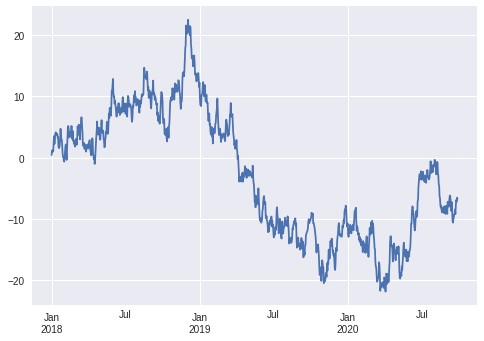

In [162]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2018', periods=1000))
print(ts.head(10))
ts = ts.cumsum()
print(ts.head(10))
ts.plot()

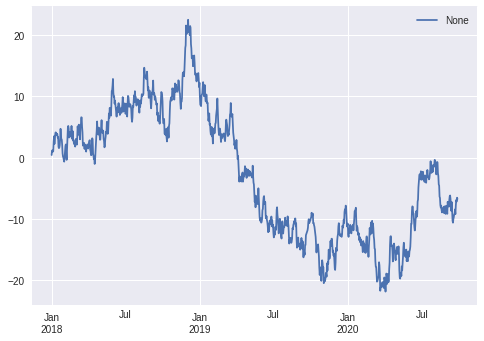

In [167]:
import matplotlib.pyplot as plt
plt.figure()
ts.plot();
plt.legend()

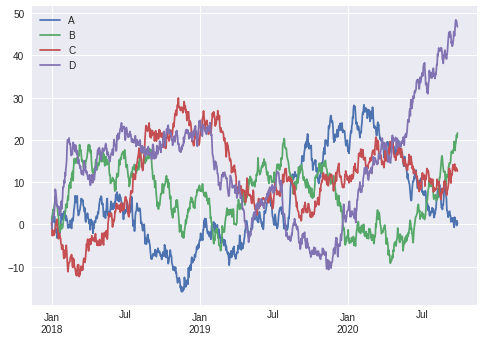

In [168]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()
plt.legend(loc='best')

# Getting Data In/Out
## CSV


In [169]:
df

,A,B,C,D
2018-01-01,0.228604,1.110267,0.384525,-0.922433
2018-01-02,0.666532,1.661540,-1.333466,-0.799325
2018-01-03,1.969030,2.172882,-2.677732,1.065128
2018-01-04,2.043379,2.891363,-1.364889,1.296960
2018-01-05,1.452241,3.565826,-1.957949,1.283550
2018-01-06,1.075287,3.140818,-2.360401,2.378409
2018-01-07,0.553514,4.251383,-2.523106,2.133042
2018-01-08,1.903804,4.455830,-2.434813,3.435224
2018-01-09,0.799692,5.322185,-1.351450,5.117792
2018-01-10,0.671273,6.514395,-0.891220,8.327011


In [0]:
df.to_csv('foo.csv')

In [171]:
ls

datalab/  foo.csv


In [172]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2018-01-01,0.228604,1.110267,0.384525,-0.922433
1,2018-01-02,0.666532,1.661540,-1.333466,-0.799325
2,2018-01-03,1.969030,2.172882,-2.677732,1.065128
3,2018-01-04,2.043379,2.891363,-1.364889,1.296960
4,2018-01-05,1.452241,3.565826,-1.957949,1.283550


## HDF5

In [185]:
ls

datalab/  foo.csv


In [188]:
!pip install tables  # for HD5
df.to_hdf('foo.h5', 'df')
df2.to_hdf('foo.h5', 'df2')
print(pd.read_hdf('foo.h5', 'df').head())
print('--------------------------------------------------')
print(pd.read_hdf('foo.h5', 'df2').head())

                   A         B         C         D
2018-01-01  0.228604  1.110267  0.384525 -0.922433
2018-01-02  0.666532  1.661540 -1.333466 -0.799325
2018-01-03  1.969030  2.172882 -2.677732  1.065128
2018-01-04  2.043379  2.891363 -1.364889  1.296960
2018-01-05  1.452241  3.565826 -1.957949  1.283550
--------------------------------------------------
                     A         B
first second                    
bar   one    -0.029448 -0.204328
      two    -0.478140  1.015604
baz   one    -1.287390 -0.724450
      two    -1.336391  0.069869


## Excel

In [190]:
!pip install openpyxl
df.to_excel('foo.xlsx', sheet_name='myDFsheet')

    100% |████████████████████████████████| 174kB 3.9MB/s 
  Running setup.py bdist_wheel for openpyxl ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/11/7d/47/3dad56b5d260c790d9110623ba66783a2ad345eb76dd63003b
  Running setup.py bdist_wheel for et-xmlfile ... - done
  Stored in directory: /content/.cache/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built openpyxl et-xmlfile


In [193]:
!pip install xlrd
pd.read_excel('foo.xlsx', 'myDFsheet', index_col=None, na_values=['NA'])

    100% |████████████████████████████████| 112kB 2.5MB/s 


,A,B,C,D
2018-01-01,0.228604,1.110267,0.384525,-0.922433
2018-01-02,0.666532,1.661540,-1.333466,-0.799325
2018-01-03,1.969030,2.172882,-2.677732,1.065128
2018-01-04,2.043379,2.891363,-1.364889,1.296960
2018-01-05,1.452241,3.565826,-1.957949,1.283550
2018-01-06,1.075287,3.140818,-2.360401,2.378409
2018-01-07,0.553514,4.251383,-2.523106,2.133042
2018-01-08,1.903804,4.455830,-2.434813,3.435224
2018-01-09,0.799692,5.322185,-1.351450,5.117792
2018-01-10,0.671273,6.514395,-0.891220,8.327011
